## Cross-Sell Prediction
Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. 

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

### Objective
To identifying whether customer is interested in vehicle insurance or not

- id	-	Unique ID for the customer
- Gender	-	Gender of the customer
- Age	-	Age of the customer
- Driving_License	-	0: Customer does not have DL, 1: Customer already has DL
- Region_Code	-	Unique code for the region of the customer
- Previously_Insured	-	1: Customer already has Vehicle Insurance, 0: Customer doesn't have Vehicle Insurance
- Vehicle_Age	-	Age of the Vehicle
- Vehicle_Damage	-	1: Customer got his/her vehicle damaged in the past, 0: Customer didn't get his/her vehicle damaged in the past
- Annual_Premium	-	The amount customer needs to pay as premium in the year
- Policy_Sales_Channel	-	Anonymised Code for the channel of outreaching to the customer (e.g., Different Agents, Over Mail, Over Phone, In Person, etc.)
- Vintage	-	Number of Days, Customer has been associated with the company


### Target Variable
Response 
- 1: Customer is interested, 
- 0: Customer is not interested

In [1]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission_iA3afxn.csv')

# Understanding the data

In [3]:
#to see no. of features and observation
train.shape, test.shape, sub.shape

((381109, 12), (127037, 11), (127037, 2))

In [4]:
#to check missing values
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [5]:
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
# to check duplicates
train.duplicated().sum()

0

In [7]:
#to see data type of the column
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [8]:
# get all details of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [9]:
# check target data
train['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [10]:
train['Response'].value_counts(normalize=True)*100

Response
0    87.743664
1    12.256336
Name: proportion, dtype: float64

<Axes: xlabel='Response'>

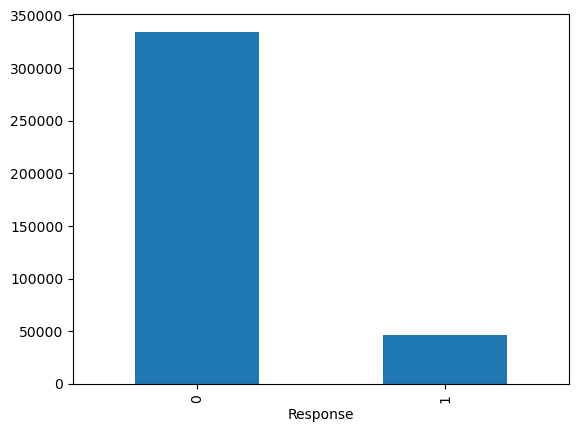

In [11]:
train['Response'].value_counts().plot(kind='bar')

In [12]:
# statistical info

train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [13]:
train.describe(include='object').T

,count,unique,top,freq
Gender,381109,2,Male,206089
Vehicle_Age,381109,3,1-2 Year,200316
Vehicle_Damage,381109,2,Yes,192413


In [14]:
train.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

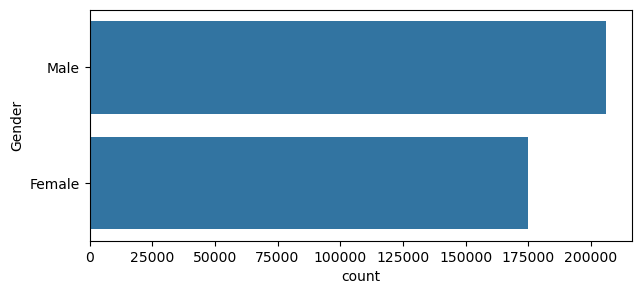

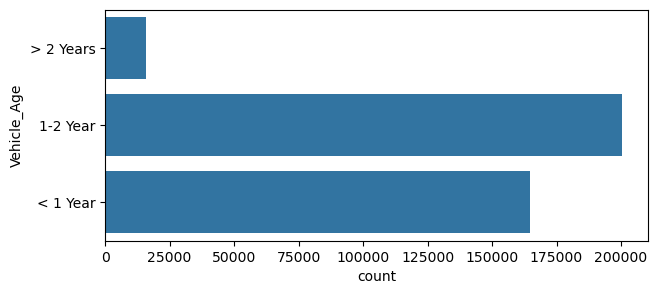

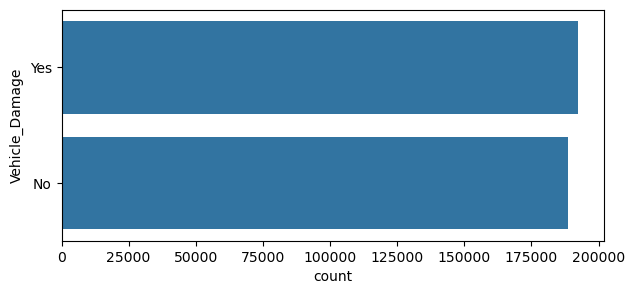

In [15]:
for col in train.select_dtypes(include='object').columns:
    plt.figure(figsize=(7,3))
    sns.countplot(y=train[col])
    plt.show()

In [16]:
train['Previously_Insured'].value_counts()

Previously_Insured
0    206481
1    174628
Name: count, dtype: int64

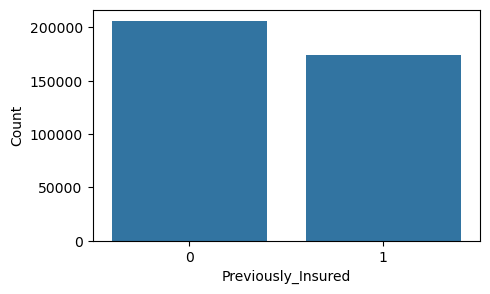

In [17]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Previously_Insured', data=train)
plt.xlabel('Previously_Insured')
plt.ylabel('Count')
plt.show()

# Preprocessing

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [19]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [20]:
#identifying columns
target_col = ['Response']
ignore_col = ['id']
categorical_col = train.select_dtypes(include=object).columns
numerical_col = train.select_dtypes(exclude=object).columns

In [21]:
train[numerical_col].head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,40454.0,26.0,217,1
1,2,76,1,3.0,0,33536.0,26.0,183,0
2,3,47,1,28.0,0,38294.0,26.0,27,1
3,4,21,1,11.0,1,28619.0,152.0,203,0
4,5,29,1,41.0,1,27496.0,152.0,39,0


In [22]:
train[categorical_col].head()

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No


In [23]:
#dropping target col and employee id column
numerical_col = train.select_dtypes(exclude=object).drop(columns=ignore_col+target_col).columns

In [24]:
#creating pipeline to do preprocessing of ctegorical column
cat_pipe_encode = Pipeline(
    steps = [
        ('impute_categorical', SimpleImputer(strategy= 'most_frequent')), #missing values with most frequent value
        ('ohe', OneHotEncoder(handle_unknown = 'ignore')) #categorical encoding
    ]
)

In [25]:
num_pipe_encode = Pipeline(
    steps =[
        ('impute_num', SimpleImputer(strategy='median')), #missing value with median value
        ('scale', StandardScaler()) #standard scaler
    ]
)

In [26]:
#creating map between the pipeline and the columns
preprocess = ColumnTransformer(
    transformers=[
        ('cat_encode', cat_pipe_encode,categorical_col), #categorical columns
        ('num_encode', num_pipe_encode,numerical_col) #numerical columns
    ]
)

In [27]:
#Creating object for logistic regression algorithm
mymodel = LogisticRegression() 

In [28]:
#merging the preprocessing and modelling in a pipeline
model_pipeline = Pipeline(
      steps = [
        ('preprocess', preprocess), #preprocessing
        ('model', mymodel) #modelling
     ]
)   

In [29]:
#split the train dataset to train and validation
X=train.drop(columns=target_col+ignore_col)

In [30]:
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39


In [31]:
y=train[target_col]
y.head(3)

,Response
0,1
1,0
2,1


In [32]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.1, random_state=42)

In [33]:
#fit model
model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_categorical',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [34]:
#perform prediction with train
model_pipeline.predict(train_X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
y_pred_proba = model_pipeline.predict_proba(test_X)[:,1]

In [36]:
# evaluation method
def model_train_test_evaluation(train_X, test_X, train_y, test_y, model_pipeline):
    predict_train=model_pipeline.predict(train_X)
    predict_test=model_pipeline.predict(test_X)

    print('Train AUC Score:', roc_auc_score(train_y, predict_train))
    print('Test AUC Score:', roc_auc_score(test_y, predict_test))
# plot roc-auc
    y_pred_proba = model_pipeline.predict_proba(test_X)[:,1]
    plt.figure()
    fpr, tpr, thrsh = roc_curve(test_y,y_pred_proba)
    #roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr)
    plt.show()

Train AUC Score: 0.5000635495727982
Test AUC Score: 0.49998499759961595


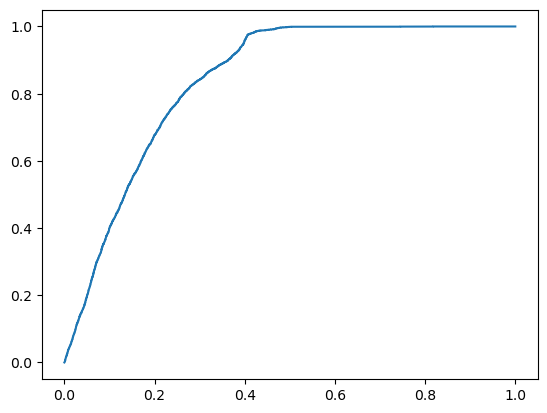

In [37]:
model_train_test_evaluation(train_X, test_X, train_y, test_y, model_pipeline)

In [38]:
# updating the existing target values with predicted values
sub['Response'] = model_pipeline.predict(test)

In [39]:
sub.to_csv('submission_prediction.csv',index=False)

In [40]:
import joblib

In [41]:
#creating pickle file 
joblib.dump(model_pipeline,'insurance_model.pkl')

['insurance_model.pkl']

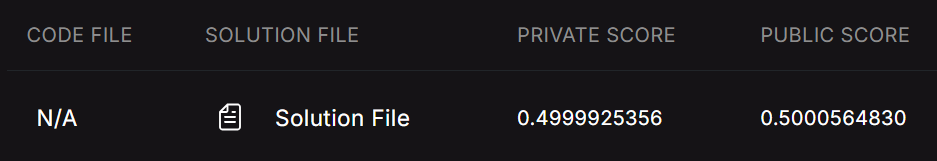

## Using GridSearch to hyper tune single model


In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [43]:
# set the hyper parameters

params = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    }    
]

In [44]:
# map the grid parameters with pipeline

grid = GridSearchCV(estimator=model_pipeline, param_grid=params, cv=2, scoring='roc_auc')

In [45]:
# fit the grid model

grid.fit(train_X, train_y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_categorical',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression(C=0.5)],
                          'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]}],
             scoring='roc_auc')

In [46]:
# get the best parameter

grid.best_params_

{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': 'l2'}

In [47]:
# show the grid results

res_df = pd.DataFrame(grid.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': 'l2'}",0.836339,1
1,"{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': None}",0.836337,3
2,"{'model': LogisticRegression(C=0.5), 'model__C': 3, 'model__penalty': 'l2'}",0.836337,2
3,"{'model': LogisticRegression(C=0.5), 'model__C': 3, 'model__penalty': None}",0.836337,3


In [48]:
train.columns.difference(test.columns)

Index(['Response'], dtype='object')

In [49]:
# updating the existing target values with predicted values
sub['Response'] = model_pipeline.predict(test)

In [50]:
sub.to_csv('sub_pred1.csv',index=False)

In [51]:
import joblib

In [52]:
joblib.dump(model_pipeline,'insurance_model.pkl')

['insurance_model.pkl']

## Perform oversampling to balance the dataset

In [53]:
from imblearn.over_sampling import RandomOverSampler

In [54]:
over_sampling = RandomOverSampler()

In [55]:
train_X_os, train_y_os = over_sampling.fit_resample(train_X,train_y)

In [56]:
train_y_os.value_counts()

Response
0           301071
1           301071
Name: count, dtype: int64

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
params_2 = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[3,5]
    }
]

In [59]:
params_2

[{'model': [LogisticRegression()],
  'model__penalty': ['l2', None],
  'model__C': [0.5, 3]},
 {'model': [DecisionTreeClassifier()], 'model__max_depth': [3, 5]}]

In [60]:
grid_2 = GridSearchCV(estimator=model_pipeline, param_grid=params_2, cv=2, scoring='roc_auc')

In [61]:
grid_2.fit(train_X_os, train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_categorical',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImp...
                                                                         Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]},
                         {'model': [DecisionTreeClassifier(max_depth=5)],
                          'model__max_depth': [3, 5]}],
             scoring='roc_auc')

In [62]:
grid_2

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_categorical',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImp...
                                                                         Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]},
                         {'model': [DecisionTreeClassifier(max_depth=5)],
                          'model__max_depth': [3, 5]}],
             scoring='roc_auc')

In [63]:
grid_2.best_params_

{'model': DecisionTreeClassifier(max_depth=5), 'model__max_depth': 5}

In [64]:
grid_2.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_categorical',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier(max_depth=5))])

In [65]:
grid_2.cv_results_

{'mean_fit_time': array([2.77257097, 2.99050784, 2.72532809, 2.8975085 , 2.87492335,
        3.40397608]),
 'std_fit_time': array([0.32838738, 0.07287526, 0.21694267, 0.09983933, 0.0249511 ,
        0.11819422]),
 'mean_score_time': array([0.97299492, 1.13629723, 0.98834777, 1.09747565, 0.91415882,
        1.05916727]),
 'std_score_time': array([0.16799343, 0.00286889, 0.15394926, 0.03876913, 0.1414938 ,
        0.03253472]),
 'param_model': masked_array(data=[LogisticRegression(), LogisticRegression(),
                    LogisticRegression(), LogisticRegression(),
                    DecisionTreeClassifier(max_depth=5),
                    DecisionTreeClassifier(max_depth=5)],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_model__C': masked_array(data=[0.5, 0.5, 3, 3, --, --],
              mask=[False, False, False, False,  True,  True],
        fill_value='?',
             dtype=object),
 'param_model__pena

In [66]:
new_model = grid_2.best_estimator_

Train AUC Score: 0.7912720840699085
Test AUC Score: 0.7955030488340398


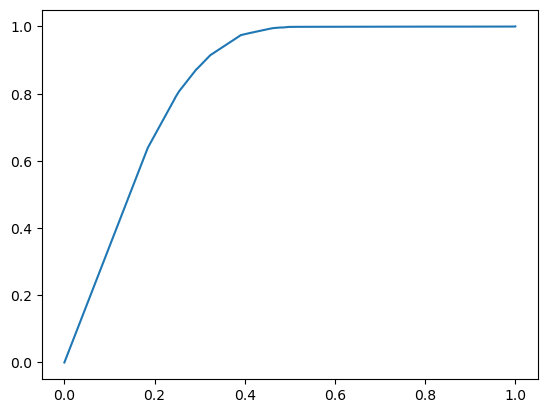

In [67]:
model_train_test_evaluation(train_X,test_X,train_y,test_y,new_model)

Train AUC Score: 0.7913199876441106
Test AUC Score: 0.7955030488340398


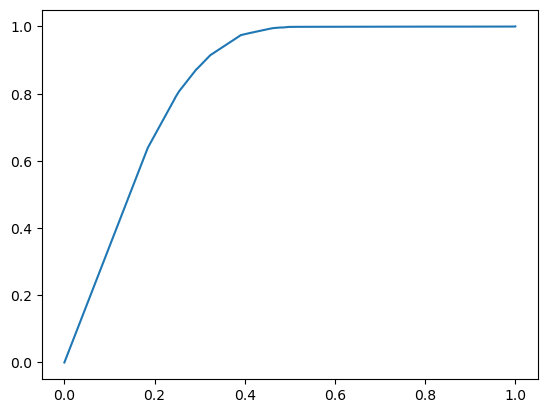

In [68]:
model_train_test_evaluation(train_X_os,test_X,train_y_os,test_y,new_model)

In [69]:
res_df_2 = pd.DataFrame(grid_2.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df_2[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.836605,2
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}",0.836605,4
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.836605,3
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}",0.836605,4
4,"{'model': DecisionTreeClassifier(max_depth=5), 'model__max_depth': 3}",0.817007,6
5,"{'model': DecisionTreeClassifier(max_depth=5), 'model__max_depth': 5}",0.837558,1


In [70]:
# updating the existing target values with predicted values
sub['Response'] = new_model.predict(test)
sub.to_csv('sub_pred2.csv',index=False)

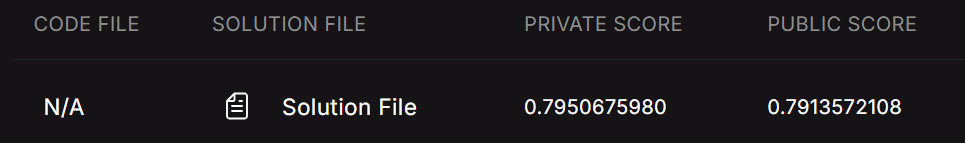